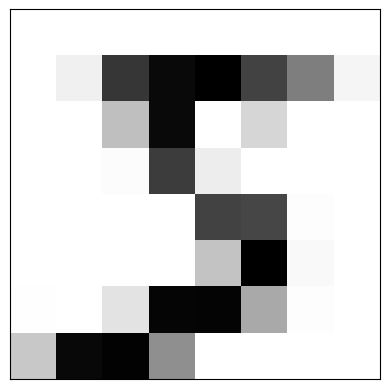

In [1]:
from class_QAutoencoder import model_obj, data_zoom, size_final
from class_QAutoencoder import *

ax = plt.subplot(1, 1, 1)
plt.imshow(data_zoom.x_train[0].reshape(size_final, size_final), cmap='gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# def model

In [2]:
BIT_WIDTH = 8
# EPOCHS = 80
# Q_EPOCHS = 25
EPOCHS = 1
Q_EPOCHS = 1
BATCH_SIZE = 256
MODEL_NAME = 'model'
MINI = False
FIT_MODEL = True
MODEL_SIZE = 0  # 0: short, 1: medium, 2: long, 3: very long
mini = "_mini" if MINI else ""

model_obj = QAutoencoder(data_zoom, bit_width=BIT_WIDTH,
                         EPOCHS=EPOCHS, Q_EPOCHS=Q_EPOCHS, model_name=MODEL_NAME)

model_obj.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_4 (Dense)             (None, 15)                975       
                                                                 
 dense_5 (Dense)             (None, 2)                 32        
                                                                 
 dense_6 (Dense)             (None, 15)                45        
                                                                 
 dense_7 (Dense)             (None, 64)                1024      
                                                                 
Total params: 2,076
Trainable params: 2,076
Non-trainable params: 0
_________________________________________________________________


# fit

In [3]:
if FIT_MODEL:
    model_obj.fit_data(epochs=EPOCHS)  # batch_size=BATCH_SIZE, epochs=EPOCHS)


215/235 [==========================>...] - ETA: 0s - loss: 0.1117
***callbacks***
saving losses to model/callbacks\losses.log

Epoch 00001: val_loss improved from inf to 0.08694, saving model to model/callbacks\KERAS_check_best_model.model
INFO:tensorflow:Assets written to: model/callbacks\KERAS_check_best_model.model\assets

Epoch 00001: val_loss improved from inf to 0.08694, saving model to model/callbacks\KERAS_check_best_model_weights.h5

Epoch 00001: saving model to model/callbacks\KERAS_check_model_last.model
INFO:tensorflow:Assets written to: model/callbacks\KERAS_check_model_last.model\assets

Epoch 00001: saving model to model/callbacks\KERAS_check_model_last_weights.h5

***callbacks end***

235/235 [==============================] - 4s 13ms/step - loss: 0.1097 - val_loss: 0.0869 - lr: 0.0010
INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/KERAS_check_best_model.model\assets
233/235 [============================>.] - ETA: 0s - loss: 0.0849
***callbacks***

INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_best_model.model\assets


INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_best_model.model\assets



Epoch 00001: val_loss improved from inf to 0.08346, saving model to model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_best_model_weights.h5

Epoch 00001: saving model to model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_model_last.model


INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_model_last.model\assets


INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_model_last.model\assets



Epoch 00001: saving model to model/model_15_2_15_64_0.08694loss/QAE8bits/callbacks\KERAS_check_model_last_weights.h5

***callbacks end***

235/235 [==============================] - 10s 35ms/step - loss: 0.0849 - val_loss: 0.0835 - lr: 0.0010


INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/QAE8bits/KERAS_check_best_model.model\assets


INFO:tensorflow:Assets written to: model/model_15_2_15_64_0.08694loss/QAE8bits/KERAS_check_best_model.model\assets


INFO:tensorflow:Assets written to: C:\Users\luisa\AppData\Local\Temp\tmpfohemrvl\assets


INFO:tensorflow:Assets written to: C:\Users\luisa\AppData\Local\Temp\tmpfohemrvl\assets


# Load objects

In [4]:
model_obj.loss

0.08694251626729965

## load it 

### definitions

In [5]:
# BIT_WIDTH = 8
# EPOCHS = 80
# Q_EPOCHS = 40
# BATCH_SIZE = 256
# model_name = 'model'

In [7]:
# list all folders in the given directory
import os

def get_best_model_path(path):
    if directories := [
    d
    for d in os.listdir(path)
    if d.startswith('model_') and d.endswith('loss')
]:
    # Extract loss value from each directory name
        losses = [float(d.split('_')[1].replace('loss', '')) for d in directories]

    # Select directory with lowest loss value
        lowest_loss_index = losses.index(min(losses))
        lowest_loss_dir = directories[lowest_loss_index]
        print(f"The directory with the lowest loss is {lowest_loss_dir}")
        return f"{path}/{lowest_loss_dir}"

    else:
        print("No directories found with name pattern 'model_*loss'")
        return ""


path = f'./model{mini}'  # Replace with the path to the directory you want to list    
MODEL_DIR = get_best_model_path(path)

MODEL_DIR

The directory with the lowest loss is model_15_2_15_64_0.08694loss


'./model/model_15_2_15_64_0.08694loss'

In [8]:
f"{MODEL_DIR}/KERAS_check_best_model{mini}.model"

'./model/model_15_2_15_64_0.08694loss/KERAS_check_best_model.model'

In [12]:
os.listdir(MODEL_DIR)

['KERAS_check_best_model.model', 'QAE8bits', 'saved_objects']

In [16]:
os.listdir(f"{MODEL_DIR}/KERAS_check_best_model{mini}.model")

['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']

In [ ]:
saved_objects/tflite_model.tflite.tflite

In [17]:
import pickle

def load_objects():
    
    # model_obj.model.save('model_obj_keras_model.h5')
    # Load the TensorFlow model
    loaded_model = tf.keras.models.load_model(f"{MODEL_DIR}/KERAS_check_best_model{mini}.model")

    # Load the Keras model
    # loaded_keras_model = tf.keras.models.load_model(f'{MODEL_DIR}/model_obj_keras_model{mini}.h5')

    # Load the .tflite model
    with open(f"{MODEL_DIR}/saved_objects{mini}/tflite_model.tflite", "rb") as file:
        loaded_tflite_model = file.read()

    # Load other attributes
    with open(f'{MODEL_DIR}/saved_objects{mini}/model_obj_attributes{mini}.pickle', 'rb') as f:
        loaded_attributes = pickle.load(f)
    
    # Create a new QAutoencoder object and set the attributes
    loaded_model_obj = QAutoencoder(data_zoom, bit_width=loaded_attributes['BIT_WIDTH'], model_name=loaded_attributes['model_name'],
                                    EPOCHS=loaded_attributes['EPOCHS'], Q_EPOCHS=loaded_attributes['Q_EPOCHS'])
    
    loaded_model_obj.model = loaded_model
    # loaded_model_obj.model = loaded_keras_model
    loaded_model_obj.quantized_tflite_model = loaded_tflite_model

    loaded_model_obj.x_train = loaded_attributes['x_train']
    # loaded_model_obj.y_train = loaded_attributes['y_train']
    loaded_model_obj.x_test = loaded_attributes['x_test']
    # loaded_model_obj.y_test = loaded_attributes['y_test']
    loaded_model_obj.input_min = loaded_attributes['input_min']
    loaded_model_obj.input_max = loaded_attributes['input_max']
    loaded_model_obj.input_shape = loaded_attributes['input_shape']
    loaded_model_obj.BIT_WIDTH = loaded_attributes['BIT_WIDTH']
    loaded_model_obj.EPOCHS = loaded_attributes['EPOCHS']
    loaded_model_obj.Q_EPOCHS = loaded_attributes['Q_EPOCHS']
    loaded_model_obj.model_name = loaded_attributes['model_name']
    loaded_model_obj.history = loaded_attributes['history']
    loaded_model_obj.loss = loaded_attributes['loss']
    loaded_model_obj.float_model_predictions = loaded_attributes['float_model_predictions']
    loaded_model_obj.path_to_model = loaded_attributes['path_to_model']

    loaded_model_obj.path_to_quantized_model = loaded_attributes['path_to_quantized_model']
    # loaded_model_obj.q_aware_model = loaded_attributes['q_aware_model']
    loaded_model_obj.q_aware_loss = loaded_attributes['q_aware_loss']
    loaded_model_obj.quantized_tflite_model = loaded_attributes['quantized_tflite_model']
    # loaded_model_obj.interpreter = loaded_attributes['interpreter']
    # loaded_model_obj.input_details = loaded_attributes['input_details']
    # loaded_model_obj.output_details = loaded_attributes['output_details']
    loaded_model_obj.quantized_model_predictions = loaded_attributes['quantized_model_predictions']
    
    # loaded_model_obj.interpreter = loaded_tflite_model
    # loaded_model_obj.mse = loaded_attributes['mse']

    # Recreate the TFLite interpreter
    loaded_model_obj.interpreter = tf.lite.Interpreter(model_content=loaded_tflite_model)
    loaded_model_obj.interpreter.allocate_tensors()
    loaded_model_obj.input_details = loaded_model_obj.interpreter.get_input_details()
    loaded_model_obj.output_details = loaded_model_obj.interpreter.get_output_details()
    # loaded_model_obj.convert_to_Q_aware()

    return loaded_model_obj

# # Load the objects and create a new model_obj
# loaded_model_obj = load_objects()

### loaded model

In [18]:
# Load the objects and create a new model_obj
loaded_model_obj = load_objects()

FileNotFoundError: [Errno 2] No such file or directory: './model/model_15_2_15_64_0.08694loss/model_obj_attributes.pickle'

In [ ]:
loaded_model_obj.loss

In [ ]:
loaded_model_obj.x_train.shape

In [ ]:
loaded_model_obj.model.summary()

In [ ]:
loaded_model_obj.plot_float_model()


In [ ]:
loaded_model_obj.quantized_predictions(n=20)
loaded_model_obj.plot_quantized_model(n=20)

In [ ]:
# loaded_model_obj.quantized_predictions2(n=20)
# loaded_model_obj.plot_quantized_model(n=20)

In [ ]:
# loaded_model_obj.quantized_model_predictions

In [ ]:
# for i, img in enumerate(loaded_model_obj.quantized_model_predictions):
#     print(f' ------------ Image {i} ------------')
#     for j, row in enumerate(img):
#         for k, pixel in enumerate(row):
#             print(pixel, " : ", Fxp(pixel, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
#             # print(Fxp(pixel, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
#             print(' ')
        

In [ ]:
from fxpmath import Fxp
# BIT_WIDTH = 8
is_signed = True
TB_FILES_DIR = 'model/testbench_files'
if not os.path.exists(TB_FILES_DIR):
    os.makedirs(TB_FILES_DIR)

In [ ]:
quantized_model_predictions = []
pred_len = len(loaded_model_obj.quantized_model_predictions)

with open('model/testbench_files/inputs_string.txt', 'w') as f:

    for img in range(pred_len):
        # Prepare input data
        input_data = np.array([(loaded_model_obj.x_test[img] - loaded_model_obj.input_min) / (loaded_model_obj.input_max - loaded_model_obj.input_min) * (2 ** (loaded_model_obj.BIT_WIDTH))], dtype=np.int8)

        for pixel in input_data[0]:
            fxp_item = Fxp(pixel, signed=True, n_word=loaded_model_obj.BIT_WIDTH, n_frac=0)
            # print(pixel, " = ", fxp_item, " : ", fxp_item.bin())

            f.write(fxp_item.bin())
        f.write("\n")

        # print(f"input_data: {input_data}")



In [ ]:
#  generating expected results for testbench
with open(f'{TB_FILES_DIR}/expected_results.txt', 'w') as f:
    for img in loaded_model_obj.quantized_model_predictions:
        for row in img:
            for pixel in row:
                # print(pixel, " : ", Fxp(pixel, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
                f.write(Fxp(pixel, signed=is_signed, n_word=loaded_model_obj.BIT_WIDTH, n_frac=0).bin())
        # print(" ")
        f.write('\n')

In [ ]:
#  generating expected results for testbench
with open(f'{TB_FILES_DIR}/expected_results_dec.txt', 'w') as f:
    for img in loaded_model_obj.quantized_model_predictions:
        for row in img:
            for pixel in row:
                # print(pixel, " : ", Fxp(pixel, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
                f.write(f"{str(pixel)} ")
        # print(" ")
        f.write('\n')

In [ ]:
# loaded_model_obj.model.get_weights()

In [ ]:
# loaded_model_obj.quantized_tflite_model

# Clone and fine-tune pre-trained model with quantization aware training


In [ ]:
model_obj.model

In [ ]:
# import tensorflow_model_optimization as tfmot
# model = model_obj.model
# quantize_model = tfmot.quantization.keras.quantize_model

# # q_aware stands for for quantization aware.
# q_aware_model = quantize_model(model)

# # `quantize_model` requires a recompile.
# # q_aware_model.compile(optimizer='adam',
# #               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
# #               metrics=['accuracy'])
# q_aware_model.compile(optimizer='adam', loss='mse')

# q_aware_model.summary()

### Train and evaluate the model against baseline

To demonstrate fine tuning after training the model for just an epoch, fine tune with quantization aware training on a subset of the training data.

In [ ]:
model_obj.x_train[0:1000]

In [ ]:
# train_images_subset = model_obj.x_train[0:1000] # out of 60000
# train_labels_subset = model_obj.x_train[0:1000]

# q_aware_model.fit(train_images_subset, train_labels_subset,
#                   batch_size=500, epochs=1)

In [ ]:
# baseline_model_accuracy = model_obj.model.evaluate(
#     model_obj.x_test, model_obj.x_test, verbose=0)

# q_aware_model_accuracy = model_obj.q_aware_model.evaluate(
#    model_obj.x_test, model_obj.x_test, verbose=0)

# print('Baseline test accuracy:', baseline_model_accuracy)
# print('Quant test accuracy:', q_aware_model_accuracy)

## Create quantized model for TFLite backend

After this, you have an actually quantized model with int8 weights and uint8 activations.

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model_obj.q_aware_model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# q_aware_model = converter.convert()

## See persistence of accuracy from TF to TFLite

Define a helper function to evaluate the TF Lite model on the test dataset.

In [ ]:
# import numpy as np

# def evaluate_model(interpreter, x_test, n=6):
# #   input_index = interpreter.get_input_details()[0]["index"]
# #   output_index = interpreter.get_output_details()[0]["index"]
#     input_details = interpreter.get_input_details()
#     output_details = interpreter.get_output_details()

# #   # Run predictions on every image in the "test" dataset.
# #   prediction_digits = []
# #   for i, test_image in enumerate(test_images):
# #     if i % 1000 == 0:
# #       print('Evaluated on {n} results so far.'.format(n=i))
# #     # Pre-processing: add batch dimension and convert to float32 to match with
# #     # the model's input data format.
# #     test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
# #     interpreter.set_tensor(input_index, test_image)

# #     # Run inference.
# #     interpreter.invoke()

# #     # Post-processing: remove batch dimension and find the digit with highest
# #     # probability.
# #     output = interpreter.tensor(output_index)
# #     digit = np.argmax(output()[0])
# #     prediction_digits.append(digit)

# #   print('\n')
# #   # Compare prediction results with ground truth labels to calculate accuracy.
# #   prediction_digits = np.array(prediction_digits)
# #   accuracy = (prediction_digits == test_labels).mean()
# #   return accuracy

#     quantized_model_predictions = []

#     for i in range(n):
#         # Prepare input data
#         # input_data = np.array(
#         #     [x_test[i]*(2**(BIT_WIDTH-1))], dtype=np.int8)
#         # input_data = np.array([(x_test[i] - input_min) / (input_max - input_min) * (2 ** (BIT_WIDTH - 1))], dtype=np.int8)  
#         input_data = np.expand_dims(x_test[i], axis=0).astype(np.float32)


#         interpreter.set_tensor(
#             input_details[0]['index'], input_data)
#         # print(f"input_data: {input_data}")
#         # Run inference
#         interpreter.invoke()

#         # Get output
#         output_data = interpreter.get_tensor(output_details[0]['index'])
#         # output_data = interpreter.get_tensor(
#         #     output_details[0]['index']) / (2 ** (BIT_WIDTH - 1))
#         # output_data = output_data * (input_max - input_min) / (2 ** (BIT_WIDTH - 1)) + input_min
#         # output_data = output_data / (2 ** (BIT_WIDTH - 1))
#         # print(f"output_data: {output_data}")
#         quantized_model_predictions.append(output_data)
#     accuracy = (input_data == quantized_model_predictions).mean()
    
#     # quantized_model_predictions = quantized_model_predictions
#     return accuracy

You evaluate the quantized model and see that the accuracy from TensorFlow persists to the TFLite backend.

In [ ]:
# interpreter = tf.lite.Interpreter(model_content=q_aware_model)
# interpreter.allocate_tensors()

# # test_accuracy = evaluate_model(interpreter, test_images=model_obj.x_test, test_labels=model_obj.x_test)
# test_accuracy = evaluate_model(interpreter, model_obj.x_test, n=6)

# print('Quant TF test accuracy:', q_aware_model_accuracy)
# print('Quant TFLite test_accuracy:', test_accuracy)

In [ ]:
# model_obj.q_aware_model.layers

In [ ]:
# for layer in model_obj.q_aware_model.layers:
#   if hasattr(layer, 'quantize_config'):
#     for weight, quantizer, quantizer_vars in layer._weight_vars:
#         quantized_and_dequantized = quantizer(weight, training=False, weights=quantizer_vars)
#         min_var = quantizer_vars['min_var']
#         max_var = quantizer_vars['max_var']
#         print(quantized_and_dequantized*(2**(BIT_WIDTH)))
#         # quantized = dequantize(quantized_and_dequantized, min_var, max_var, quantizer)

In [ ]:
# model_obj.quantized_tflite_model.layers

In [ ]:
# model_obj.interpreter.layers

In [ ]:
# model_obj.plot_float_model()

In [ ]:
# # obj = model_obj
# # plot_quantized_model(obj, n=6)
# model_obj.plot_quantized_model(n=6)

## See 4x smaller model from quantization

You create a float TFLite model and then see that the quantized TFLite model
is 4x smaller.

In [ ]:
import tempfile
import os

In [ ]:
# # Create float TFLite model.
# float_converter = tf.lite.TFLiteConverter.from_keras_model(model_obj.model)
# float_tflite_model = float_converter.convert()

# # Measure sizes of models.
# _, float_file = tempfile.mkstemp('.tflite')
# _, quant_file = tempfile.mkstemp('.tflite')

# with open(quant_file, 'wb') as f:
#   f.write(model_obj.quantized_tflite_model)

# with open(float_file, 'wb') as f:
#   f.write(float_tflite_model)

# print("Float model in Mb:", os.path.getsize(float_file) / float(2**20))
# print("Quantized model in Mb:", os.path.getsize(quant_file) / float(2**20))
# print(float_converter.get_tensor_details())